<a href="https://colab.research.google.com/github/helmypram/data-scrapping-playstore/blob/main/data_scrapping_playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qq google-play-scraper
!pip install pandas tqdm google_play_scraper pygments



In [ ]:
import json
import pandas as pd
from tqdm import tqdm
from google_play_scraper import Sort, reviews, app

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter


In [ ]:
from os import path
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "/gdrive/MyDrive"

Mounted at /content/gdrive


In [ ]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str
        )
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [ ]:
result = app (
    'id.go.pajak.djp',
    lang='id',
    country='id'
)

In [ ]:
print_json(result)

{
  "adSupported": false,
  "appId": "id.go.pajak.djp",
  "categories": [
    {
      "id": "FINANCE",
      "name": "Keuangan"
    }
  ],
  "comments": [],
  "containsAds": false,
  "contentRating": "Rating 3+",
  "contentRatingDescription": null,
  "currency": "IDR",
  "description": "M-Pajak adalah aplikasi resmi Direktorat Jenderal Pajak (DJP) yang memudahkan Wajib Pajak (WP) dalam mengelola kewajiban pajaknya. Dapatkan berbagai layanan perpajakan di genggaman Anda, seperti:\r\n\r\n1. Layanan Pembuatan Kode Billing Pembayaran Pajak secara Online:\r\n    - Buat kode billing untuk pembayaran pajak dengan mudah dan cepat.\r\n    - Pilih jenis pajak dan masukkan data yang diperlukan.\r\n    - Dapatkan kode billing yang dapat digunakan untuk pembayaran di bank, ATM, atau e-commerce.\r\n\r\n2. Layanan Lainnya (KSWP, SKF, dan Suket PP23):\r\n    - Lihat status wajib pajak Anda.\r\n    - Buat surat keterangan fiskal (SKF) dan surat keterangan (PP23) secara online.\r\n\r\n3. Peraturan Perpa

In [ ]:
app_packages = [
    'id.go.pajak.djp', #M-Pajak
    'app.signal.id', #Samsat Digital
    'id.go.bapenda.sambara' #SAMBARAsamsatjawabarat
]


In [ ]:
app_infos = []

for application in tqdm(app_packages):
    info = app(
        application,
        lang='id',
        country='id'
    )
    app_infos.append(info)

100%|██████████| 3/3 [00:00<00:00,  7.22it/s]


In [ ]:
app_infos_df = pd.DataFrame(app_infos)


In [ ]:
app_infos_df

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,contentRatingDescription,adSupported,containsAds,released,lastUpdatedOn,updated,version,comments,appId,url
0,M-Pajak,M-Pajak adalah aplikasi resmi Direktorat Jende...,M-Pajak adalah aplikasi resmi Direktorat Jende...,M-Pajak: Layanan Pajak Mudah di Genggaman,1.000.000+,1000000,2835601,2.423895,5927,3464,...,None,False,False,4 Jun 2021,29 Feb 2024,1709205074,1.4.0,[],id.go.pajak.djp,https://play.google.com/store/apps/details?id=...
1,SIGNAL–SAMSAT DIGITAL NASIONAL,SIGNAL adalah Aplikasi Samsat Digital Nasional...,SIGNAL adalah Aplikasi Samsat Digital Nasional...,Signal adalah aplikasi layanan pendaftaran STN...,1.000.000+,1000000,4781005,4.637477,143788,53699,...,None,False,False,16 Jun 2021,31 Okt 2023,1698821914,1.5.7,[],app.signal.id,https://play.google.com/store/apps/details?id=...
2,SAMBARA,Aplikasi yang dibuat BAPENDA Jawa Barat untuk ...,Aplikasi yang dibuat BAPENDA Jawa Barat untuk ...,Samsat Mobile Jawa Barat,5.000.000+,5000000,7777871,2.261360,35670,20494,...,None,False,False,2 Jan 2018,29 Nov 2022,1669783310,4.1.0,[],id.go.bapenda.sambara,https://play.google.com/store/apps/details?id=...


In [ ]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
          ap,
          lang='id',
          country='id',
          sort=sort_order,
          count= 200,
          filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df = app_reviews_df.sort_values(["appId", "at"])
app_reviews_df

100%|██████████| 3/3 [00:06<00:00,  2.06s/it]


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
1565,bb101e34-26af-4d87-aea7-58ec2527626e,Alifyani Gunarti 2,https://play-lh.googleusercontent.com/a/ACg8oc...,Sudah susah payah bikin akun karena sulitnya v...,1,8,1.2.1,2021-07-25 12:33:20,None,NaT,1.2.1,most_relevant,app.signal.id
2439,7166d9c2-4a87-4369-a536-abed7d93dead,Alfid Ardyanto,https://play-lh.googleusercontent.com/a-/ALV-U...,Saya coba registrasi dan saat pengambilan foto...,3,0,1.2.1,2021-07-27 15:29:22,"Hai Alfid, kami mohon maaf atas ketidaknyamana...",2021-07-28 08:43:05,1.2.1,most_relevant,app.signal.id
3098,c60cf06c-7bd0-4600-84b2-3ccdd832c15d,Nani Yuninda,https://play-lh.googleusercontent.com/a-/ALV-U...,Pemrosesan dari bayar sampai stnk datang 3 har...,5,5,1.2.4,2021-07-30 12:22:25,"Hai Nani, terima kasih atas ulasannya :) Terus...",2021-08-03 10:45:06,1.2.4,most_relevant,app.signal.id
3166,907412bb-186d-493f-b899-13420b72dcb5,Rahmat Agus Salim,https://play-lh.googleusercontent.com/a-/ALV-U...,"Akhirnya bisa jg, walaupun ada kendala saat pe...",5,4,1.2.4,2021-08-07 05:57:24,"Hai Rahmat, kami mohon maaf atas ketidaknyaman...",2021-08-06 11:26:34,1.2.4,most_relevant,app.signal.id
2417,46fe28c6-9833-404f-8be3-5c52ebbf4a81,Deby Mustopa,https://play-lh.googleusercontent.com/a-/ALV-U...,saya pengguna baru. saya sudah daftar tetapi s...,3,1,1.2.4,2021-08-16 05:41:51,"Hai, sebelumnya kami mohon maaf. Terkait dgn p...",2021-08-20 10:42:32,1.2.4,most_relevant,app.signal.id
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,153a797a-2fcf-48cb-86cf-5c4dfc715ad1,Naifa Aulia,https://play-lh.googleusercontent.com/a/ACg8oc...,"Sumpah membagong kan, apk gak fungsi, saya yg ...",1,0,1.4.0,2024-06-14 07:16:36,None,NaT,1.4.0,newest,id.go.pajak.djp
202,b5b3ebdc-6355-438c-9ea4-5148786da0ab,Juniar 1968,https://play-lh.googleusercontent.com/a-/ALV-U...,Tidak bisa log in,1,0,None,2024-06-14 09:39:42,None,NaT,None,newest,id.go.pajak.djp
201,8c2d6f33-cab9-46df-8429-1277f7f3d44e,12PM,https://play-lh.googleusercontent.com/a-/ALV-U...,"aplikasi sampah, sampah dan sampah,",1,0,1.4.0,2024-06-14 10:08:06,None,NaT,1.4.0,newest,id.go.pajak.djp
165,2a2f7dcf-919d-43cc-8c55-3a0468d7d2ce,warna warni,https://play-lh.googleusercontent.com/a/ACg8oc...,"Woi... Hati hati bos dgn aplikasi ini, kayakny...",1,0,1.4.0,2024-06-14 11:51:56,None,NaT,1.4.0,most_relevant,id.go.pajak.djp


from matplotlib import pyplot as plt
app_reviews_df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
app_reviews_df['thumbsUpCount'].plot(kind='hist', bins=20, title='thumbsUpCount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
app_reviews_df.groupby('sortOrder').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
app_reviews_df.groupby('appId').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
app_reviews_df.plot(kind='scatter', x='score', y='thumbsUpCount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['at']
  ys = series['score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = app_reviews_df.sort_values('at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sortOrder')):
  _plot_series(series, series_name, i)
  fig.legend(title='sortOrder', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('at')
_ = plt.ylabel('score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['at']
  ys = series['score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = app_reviews_df.sort_values('at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('appId')):
  _plot_series(series, series_name, i)
  fig.legend(title='appId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('at')
_ = plt.ylabel('score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['at']
  ys = series['thumbsUpCount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = app_reviews_df.sort_values('at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sortOrder')):
  _plot_series(series, series_name, i)
  fig.legend(title='sortOrder', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('at')
_ = plt.ylabel('thumbsUpCount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['at']
  ys = series['thumbsUpCount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = app_reviews_df.sort_values('at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('appId')):
  _plot_series(series, series_name, i)
  fig.legend(title='appId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('at')
_ = plt.ylabel('thumbsUpCount')

from matplotlib import pyplot as plt
app_reviews_df['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
app_reviews_df['thumbsUpCount'].plot(kind='line', figsize=(8, 4), title='thumbsUpCount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['appId'].value_counts()
    for x_label, grp in app_reviews_df.groupby('sortOrder')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sortOrder')
_ = plt.ylabel('appId')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(app_reviews_df['sortOrder'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(app_reviews_df, x='score', y='sortOrder', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(app_reviews_df['appId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(app_reviews_df, x='score', y='appId', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(app_reviews_df['sortOrder'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(app_reviews_df, x='thumbsUpCount', y='sortOrder', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(app_reviews_df['appId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(app_reviews_df, x='thumbsUpCount', y='appId', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
          ap,
          lang='id',
          country='id',
          sort=sort_order,
          count= 200,
          filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df = app_reviews_df.sort_values(["appId", "at"])
app_reviews_df

100%|██████████| 3/3 [00:06<00:00,  2.06s/it]


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
1565,bb101e34-26af-4d87-aea7-58ec2527626e,Alifyani Gunarti 2,https://play-lh.googleusercontent.com/a/ACg8oc...,Sudah susah payah bikin akun karena sulitnya v...,1,8,1.2.1,2021-07-25 12:33:20,None,NaT,1.2.1,most_relevant,app.signal.id
2439,7166d9c2-4a87-4369-a536-abed7d93dead,Alfid Ardyanto,https://play-lh.googleusercontent.com/a-/ALV-U...,Saya coba registrasi dan saat pengambilan foto...,3,0,1.2.1,2021-07-27 15:29:22,"Hai Alfid, kami mohon maaf atas ketidaknyamana...",2021-07-28 08:43:05,1.2.1,most_relevant,app.signal.id
3098,c60cf06c-7bd0-4600-84b2-3ccdd832c15d,Nani Yuninda,https://play-lh.googleusercontent.com/a-/ALV-U...,Pemrosesan dari bayar sampai stnk datang 3 har...,5,5,1.2.4,2021-07-30 12:22:25,"Hai Nani, terima kasih atas ulasannya :) Terus...",2021-08-03 10:45:06,1.2.4,most_relevant,app.signal.id
3166,907412bb-186d-493f-b899-13420b72dcb5,Rahmat Agus Salim,https://play-lh.googleusercontent.com/a-/ALV-U...,"Akhirnya bisa jg, walaupun ada kendala saat pe...",5,4,1.2.4,2021-08-07 05:57:24,"Hai Rahmat, kami mohon maaf atas ketidaknyaman...",2021-08-06 11:26:34,1.2.4,most_relevant,app.signal.id
2417,46fe28c6-9833-404f-8be3-5c52ebbf4a81,Deby Mustopa,https://play-lh.googleusercontent.com/a-/ALV-U...,saya pengguna baru. saya sudah daftar tetapi s...,3,1,1.2.4,2021-08-16 05:41:51,"Hai, sebelumnya kami mohon maaf. Terkait dgn p...",2021-08-20 10:42:32,1.2.4,most_relevant,app.signal.id
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,153a797a-2fcf-48cb-86cf-5c4dfc715ad1,Naifa Aulia,https://play-lh.googleusercontent.com/a/ACg8oc...,"Sumpah membagong kan, apk gak fungsi, saya yg ...",1,0,1.4.0,2024-06-14 07:16:36,None,NaT,1.4.0,newest,id.go.pajak.djp
202,b5b3ebdc-6355-438c-9ea4-5148786da0ab,Juniar 1968,https://play-lh.googleusercontent.com/a-/ALV-U...,Tidak bisa log in,1,0,None,2024-06-14 09:39:42,None,NaT,None,newest,id.go.pajak.djp
201,8c2d6f33-cab9-46df-8429-1277f7f3d44e,12PM,https://play-lh.googleusercontent.com/a-/ALV-U...,"aplikasi sampah, sampah dan sampah,",1,0,1.4.0,2024-06-14 10:08:06,None,NaT,1.4.0,newest,id.go.pajak.djp
165,2a2f7dcf-919d-43cc-8c55-3a0468d7d2ce,warna warni,https://play-lh.googleusercontent.com/a/ACg8oc...,"Woi... Hati hati bos dgn aplikasi ini, kayakny...",1,0,1.4.0,2024-06-14 11:51:56,None,NaT,1.4.0,most_relevant,id.go.pajak.djp


from matplotlib import pyplot as plt
app_reviews_df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
app_reviews_df['thumbsUpCount'].plot(kind='hist', bins=20, title='thumbsUpCount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
app_reviews_df.groupby('sortOrder').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
app_reviews_df.groupby('appId').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
app_reviews_df.plot(kind='scatter', x='score', y='thumbsUpCount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['at']
  ys = series['score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = app_reviews_df.sort_values('at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sortOrder')):
  _plot_series(series, series_name, i)
  fig.legend(title='sortOrder', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('at')
_ = plt.ylabel('score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['at']
  ys = series['score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = app_reviews_df.sort_values('at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('appId')):
  _plot_series(series, series_name, i)
  fig.legend(title='appId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('at')
_ = plt.ylabel('score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['at']
  ys = series['thumbsUpCount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = app_reviews_df.sort_values('at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sortOrder')):
  _plot_series(series, series_name, i)
  fig.legend(title='sortOrder', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('at')
_ = plt.ylabel('thumbsUpCount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['at']
  ys = series['thumbsUpCount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = app_reviews_df.sort_values('at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('appId')):
  _plot_series(series, series_name, i)
  fig.legend(title='appId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('at')
_ = plt.ylabel('thumbsUpCount')

from matplotlib import pyplot as plt
app_reviews_df['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
app_reviews_df['thumbsUpCount'].plot(kind='line', figsize=(8, 4), title='thumbsUpCount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['appId'].value_counts()
    for x_label, grp in app_reviews_df.groupby('sortOrder')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sortOrder')
_ = plt.ylabel('appId')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(app_reviews_df['sortOrder'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(app_reviews_df, x='score', y='sortOrder', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(app_reviews_df['appId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(app_reviews_df, x='score', y='appId', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(app_reviews_df['sortOrder'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(app_reviews_df, x='thumbsUpCount', y='sortOrder', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(app_reviews_df['appId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(app_reviews_df, x='thumbsUpCount', y='appId', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from google.colab import files



In [ ]:
drive.mount('/content/gdrive', force_remount=True)
path = "/gdrive/MyDrive"

Mounted at /content/gdrive


In [ ]:
app_reviews_df.to_csv(path +'/hasilreview.csv', index=None, header=True)
files.download(path +'/hasilreview.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Hitung jumlah total ulasan untuk setiap aplikasi
total_ulasan_per_aplikasi = app_reviews_df.groupby('appId')['score'].count()

# Hitung jumlah ulasan untuk setiap kombinasi aplikasi dan skor
jumlah_ulasan_per_aplikasi_dan_skor = app_reviews_df.groupby(['appId', 'score'])['score'].count()

# Hitung persentase ulasan untuk setiap kombinasi aplikasi dan skor
persentase_ulasan = jumlah_ulasan_per_aplikasi_dan_skor.div(total_ulasan_per_aplikasi, level='appId') * 100

# Ubah hasil menjadi DataFrame
persentase_ulasan_df = persentase_ulasan.reset_index(name='persentase')

# Tulis file CSV
persentase_ulasan_df.to_csv('persentase_ulasan.csv', index=False)

# Unduh file
files.download('persentase_ulasan.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

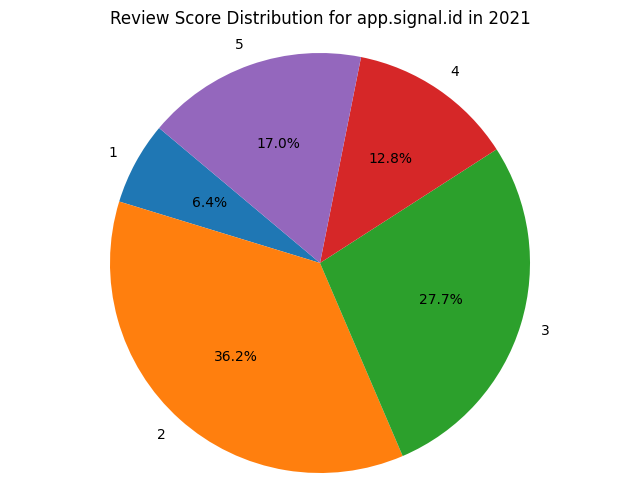

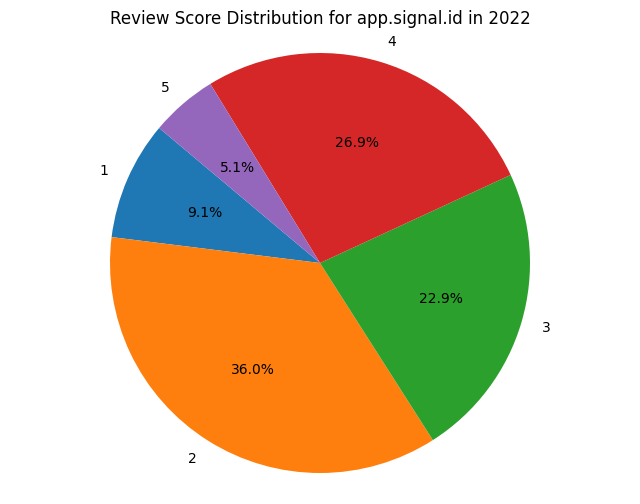

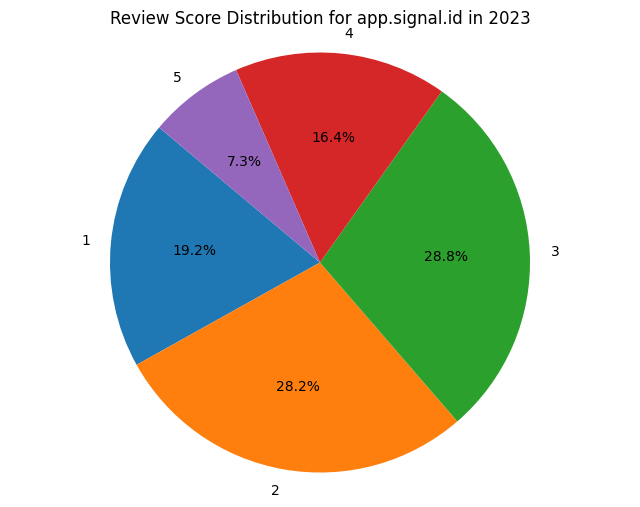

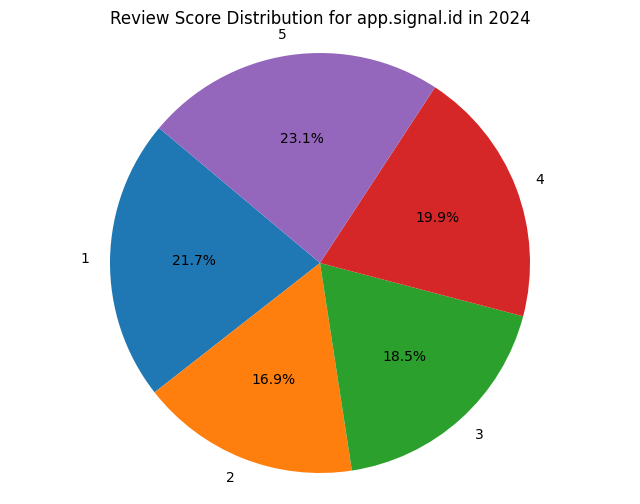

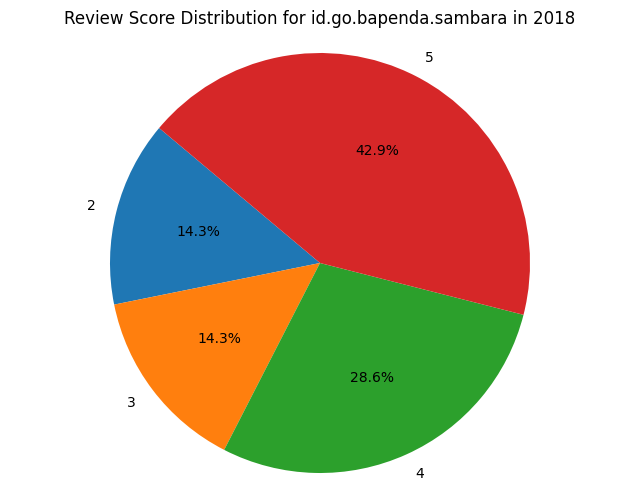

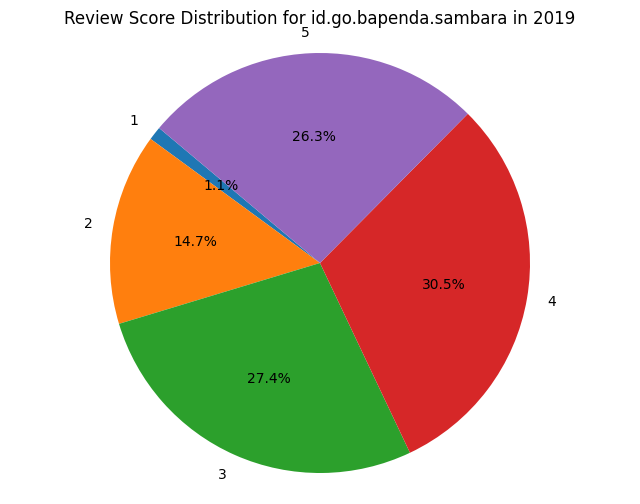

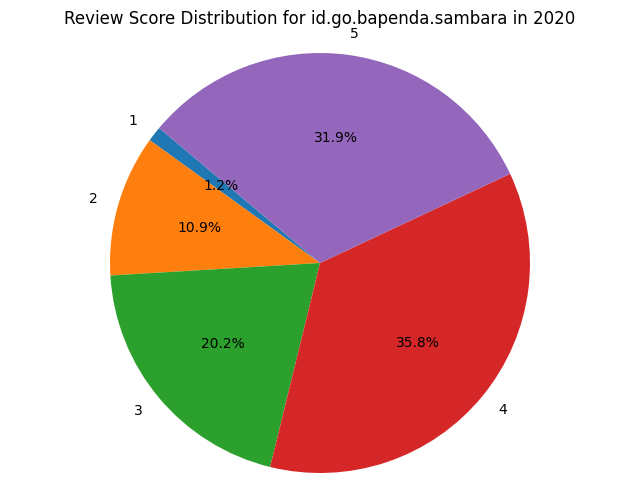

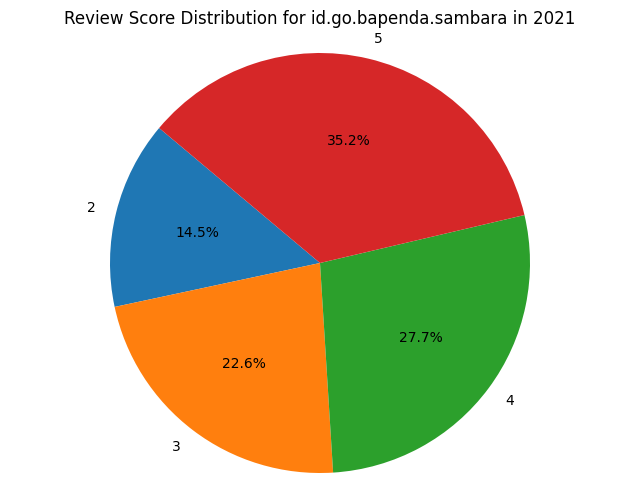

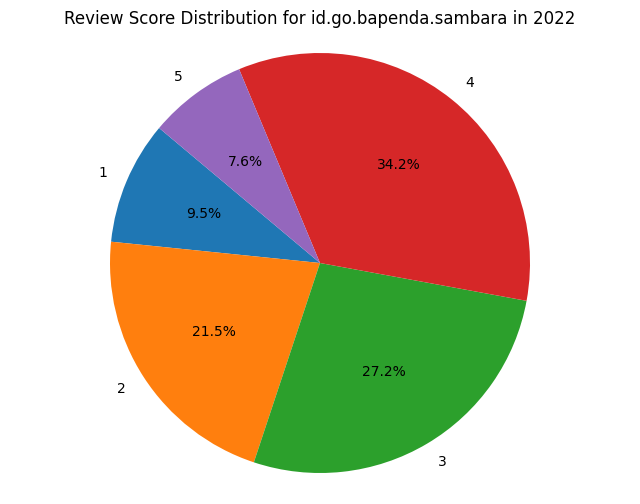

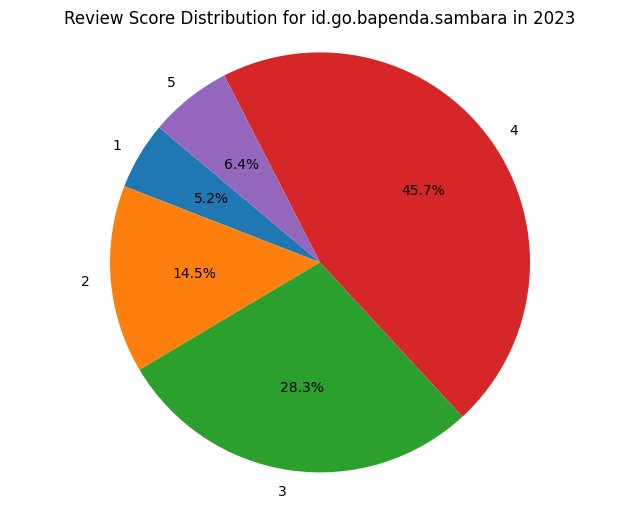

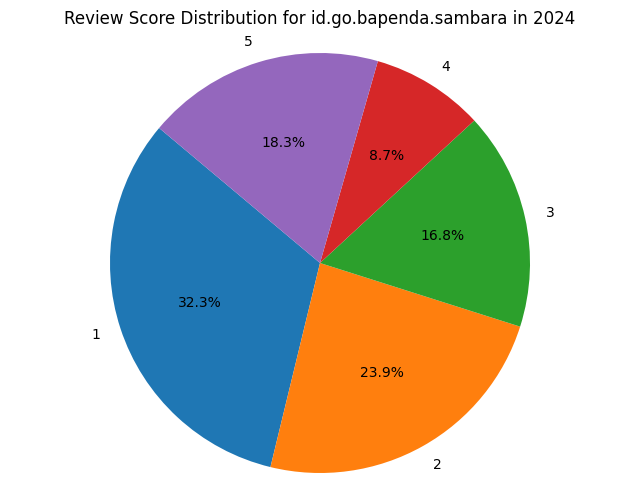

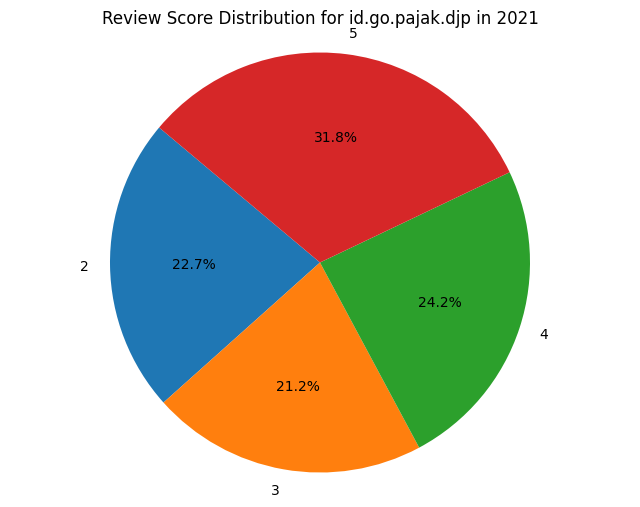

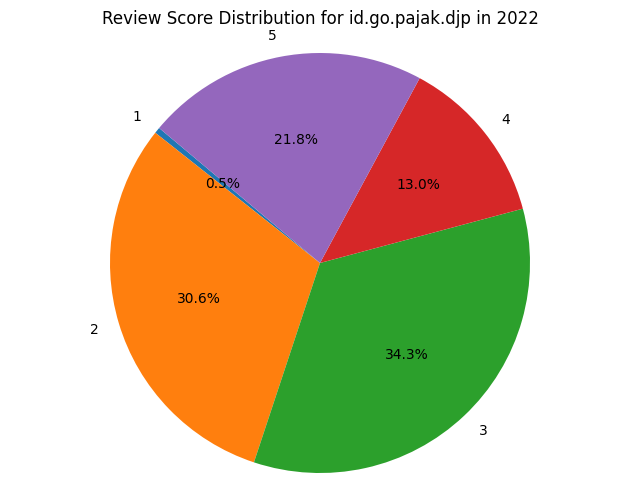

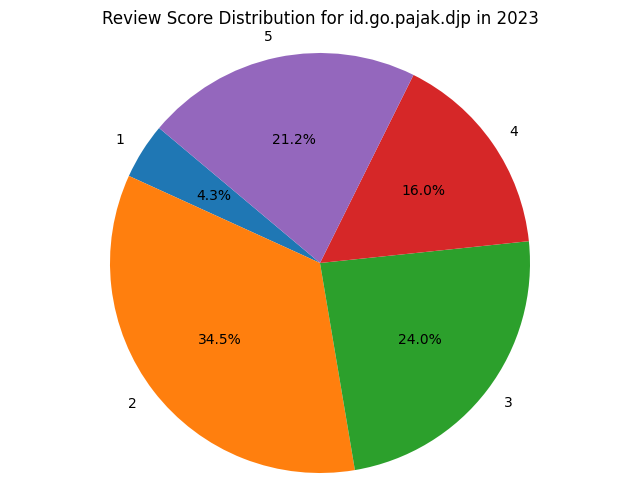

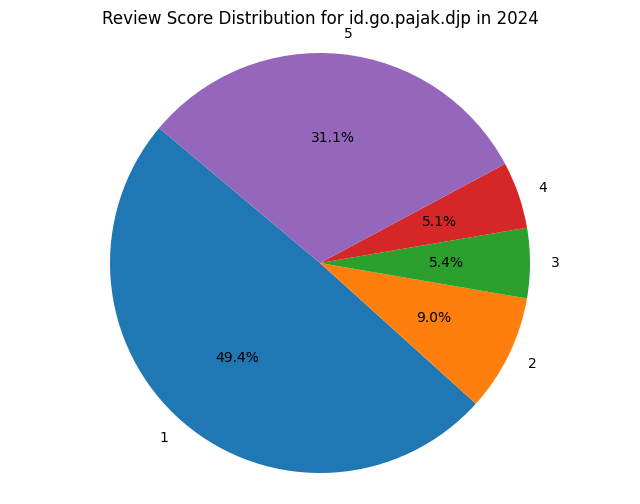

In [ ]:
# Convert to DataFrame
app_reviews_df = pd.DataFrame(app_reviews)

# Convert 'at' column to datetime
app_reviews_df['at'] = pd.to_datetime(app_reviews_df['at'])

# Extract year from 'at' column
app_reviews_df['year'] = app_reviews_df['at'].dt.year

# Group by appId, year, and score
grouped_reviews = app_reviews_df.groupby(['appId', 'year', 'score']).size().reset_index(name='count')

# Plot pie charts for each appId and year
for app_id in grouped_reviews['appId'].unique():
    app_data = grouped_reviews[grouped_reviews['appId'] == app_id]
    for year in app_data['year'].unique():
        year_data = app_data[app_data['year'] == year]

        # Plot pie chart
        plt.figure(figsize=(8, 6))
        plt.pie(year_data['count'], labels=year_data['score'], autopct='%1.1f%%', startangle=140)
        plt.title(f'Review Score Distribution for {app_id} in {year}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()